### Prepare phenoype for subtype analysis : relational task

- Build a scrubbing file to be used on subtype analysis for relational task
- Add mean run1 and run1 for FD an FD_scrubbed
- Visualize correlation between run 1 and 2 for FD and FD scrubbed
- merge clustered phenotype with scrubbing

In [1]:
# Import pandas
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
%matplotlib inline

In [3]:
# Set path
path_root = "~/Drive/HCP/"
path_scrub = os.path.join(path_root,"subtypes_scores/26-10-2016/pheno/qc_scrubbing_group.csv")
# Read scrubbing file
scrub_raw = pd.read_csv(path_scrub)
scrub_raw.head(20)

,,frames_scrubbed,frames_OK,FD,FD_scrubbed
0,HCP100206_sess1_wmRL,0.0,405.0,0.083342,0.083342
1,HCP100206_sess1_wmLR,0.0,405.0,0.082368,0.082368
2,HCP100206_sess1_gambRL,0.0,253.0,0.081728,0.081728
3,HCP100206_sess1_gambLR,0.0,253.0,0.098565,0.098565
4,HCP100206_sess1_motRL,0.0,284.0,0.090883,0.090883
5,HCP100206_sess1_motLR,0.0,284.0,0.090883,0.090883
6,HCP100206_sess2_langRL,0.0,316.0,0.088456,0.088456
7,HCP100206_sess2_langLR,0.0,316.0,0.099963,0.099963
8,HCP100206_sess2_socRL,0.0,274.0,0.084949,0.084949
9,HCP100206_sess2_socLR,0.0,274.0,0.096656,0.096656


In [4]:
# Select specific task
# run1
scrub_select_RL = scrub_raw[scrub_raw[' '].str.contains("relRL")]
scrub_select_RL.rename(columns={'FD_scrubbed':'FD_scrubbed_RL','FD ':'FD_RL'},inplace=True)
scrub_select_RL.loc[:,'ID'] = scrub_select_RL[' '].str.replace('_sess2_relRL ','')

# run2 
scrub_select_LR = scrub_raw[scrub_raw[' '].str.contains("relLR")]
scrub_select_LR.rename(columns={'FD_scrubbed':'FD_scrubbed_LR','FD ':'FD_LR'},inplace=True)
scrub_select_LR.loc[:,'ID'] = scrub_select_LR[' '].str.replace('_sess2_relLR ','')

display(scrub_select_RL.head())
display(scrub_select_LR.head())

/usr/local/lib/python3.4/dist-packages/pandas/core/frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)
/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view

,,frames_scrubbed,frames_OK,FD_RL,FD_scrubbed_RL,ID
10,HCP100206_sess2_relRL,13.0,219.0,0.098646,0.091387,HCP100206
24,HCP100307_sess2_relRL,0.0,232.0,0.108372,0.108372,HCP100307
38,HCP100408_sess2_relRL,0.0,232.0,0.113633,0.113633,HCP100408
52,HCP100610_sess2_relRL,0.0,232.0,0.184109,0.184109,HCP100610
66,HCP101006_sess2_relRL,0.0,232.0,0.146478,0.146478,HCP101006


,,frames_scrubbed,frames_OK,FD_LR,FD_scrubbed_LR,ID
11,HCP100206_sess2_relLR,0.0,232.0,0.118289,0.118289,HCP100206
25,HCP100307_sess2_relLR,0.0,232.0,0.098514,0.098514,HCP100307
39,HCP100408_sess2_relLR,0.0,232.0,0.145309,0.145309,HCP100408
53,HCP100610_sess2_relLR,15.0,217.0,0.170573,0.160610,HCP100610
67,HCP101006_sess2_relLR,13.0,219.0,0.152041,0.148402,HCP101006


In [5]:
# Select interest variables
scrub_select_LR_merge = scrub_select_LR [[' ','FD_LR','FD_scrubbed_LR','ID']]
scrub_select_RL_merge = scrub_select_RL [[' ','FD_RL','FD_scrubbed_RL','ID']]
display(scrub_select_RL_merge.head())
display(scrub_select_LR_merge.head())

,,FD_RL,FD_scrubbed_RL,ID
10,HCP100206_sess2_relRL,0.098646,0.091387,HCP100206
24,HCP100307_sess2_relRL,0.108372,0.108372,HCP100307
38,HCP100408_sess2_relRL,0.113633,0.113633,HCP100408
52,HCP100610_sess2_relRL,0.184109,0.184109,HCP100610
66,HCP101006_sess2_relRL,0.146478,0.146478,HCP101006


,,FD_LR,FD_scrubbed_LR,ID
11,HCP100206_sess2_relLR,0.118289,0.118289,HCP100206
25,HCP100307_sess2_relLR,0.098514,0.098514,HCP100307
39,HCP100408_sess2_relLR,0.145309,0.145309,HCP100408
53,HCP100610_sess2_relLR,0.170573,0.160610,HCP100610
67,HCP101006_sess2_relLR,0.152041,0.148402,HCP101006


In [6]:
# Merge the raw table 
if np.shape(scrub_select_RL_merge)[0] >= np.shape(scrub_select_LR_merge)[0]:
    merged_scrub_RL_LR = pd.merge(scrub_select_RL_merge, scrub_select_LR_merge, on='ID', how='left')
else:
    merged_scrub_RL_LR = pd.merge(scrub_select_RL_merge, scrub_select_LR_merge, on='ID', how='right')



In [7]:
merged_scrub_RL_LR.head()

,_x,FD_RL,FD_scrubbed_RL,ID,_y,FD_LR,FD_scrubbed_LR
0,HCP100206_sess2_relRL,0.098646,0.091387,HCP100206,HCP100206_sess2_relLR,0.118289,0.118289
1,HCP100307_sess2_relRL,0.108372,0.108372,HCP100307,HCP100307_sess2_relLR,0.098514,0.098514
2,HCP100408_sess2_relRL,0.113633,0.113633,HCP100408,HCP100408_sess2_relLR,0.145309,0.145309
3,HCP100610_sess2_relRL,0.184109,0.184109,HCP100610,HCP100610_sess2_relLR,0.170573,0.160610
4,HCP101006_sess2_relRL,0.146478,0.146478,HCP101006,HCP101006_sess2_relLR,0.152041,0.148402


In [8]:
merged_scrub_RL_LR_subset = merged_scrub_RL_LR[['ID','FD_RL','FD_scrubbed_RL','FD_LR','FD_scrubbed_LR']]

In [9]:
merged_scrub_RL_LR_subset.head()

,ID,FD_RL,FD_scrubbed_RL,FD_LR,FD_scrubbed_LR
0,HCP100206,0.098646,0.091387,0.118289,0.118289
1,HCP100307,0.108372,0.108372,0.098514,0.098514
2,HCP100408,0.113633,0.113633,0.145309,0.145309
3,HCP100610,0.184109,0.184109,0.170573,0.160610
4,HCP101006,0.146478,0.146478,0.152041,0.148402


In [10]:
# calculate the mean FD and FD scrubbed
merged_scrub_RL_LR_subset.loc[:,'FD_scrubbed_mean'] = merged_scrub_RL_LR_subset[['FD_scrubbed_RL','FD_scrubbed_LR']].mean(axis=1)
merged_scrub_RL_LR_subset.loc[:,'FD_mean'] = merged_scrub_RL_LR_subset[['FD_RL','FD_LR']].mean(axis=1)

# replace empty cell by nan
merged_scrub_RL_LR_subset.replace('',np.nan,inplace=True)

# remove the ID header for niak_read_csv
merged_scrub_RL_LR_subset.rename(columns={'ID':''},inplace=True)

# Save the file
merged_scrub_RL_LR_subset.to_csv(os.path.join(path_root,"subtypes_scores/26-10-2016/pheno/qc_scrubbing_group_relational.csv"), index=False)

/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [11]:
# Show final table
merged_scrub_RL_LR_subset.head()

,,FD_RL,FD_scrubbed_RL,FD_LR,FD_scrubbed_LR,FD_scrubbed_mean,FD_mean
0,HCP100206,0.098646,0.091387,0.118289,0.118289,0.104838,0.108467
1,HCP100307,0.108372,0.108372,0.098514,0.098514,0.103443,0.103443
2,HCP100408,0.113633,0.113633,0.145309,0.145309,0.129471,0.129471
3,HCP100610,0.184109,0.184109,0.170573,0.160610,0.172360,0.177341
4,HCP101006,0.146478,0.146478,0.152041,0.148402,0.147440,0.149260


In [12]:
merged_scrub_RL_LR_subset.describe()

,FD_RL,FD_scrubbed_RL,FD_LR,FD_scrubbed_LR,FD_scrubbed_mean,FD_mean
count,828.000000,828.000000,830.000000,830.000000,830.000000,830.000000
mean,0.147105,0.134541,0.151768,0.136577,0.135525,0.149387
std,0.060700,0.035907,0.074311,0.040547,0.036555,0.064105
min,0.061806,0.061806,0.063020,0.063020,0.062413,0.062413
25%,0.109573,0.108066,0.112192,0.109812,0.111075,0.113748
50%,0.135036,0.128769,0.139150,0.131066,0.129660,0.136786
75%,0.166013,0.155757,0.171159,0.158400,0.157043,0.168422
max,0.874215,0.292870,0.914675,0.630568,0.423294,0.872560


In [13]:
# find out if variables are correlated
corr= merged_scrub_RL_LR_subset.corr()

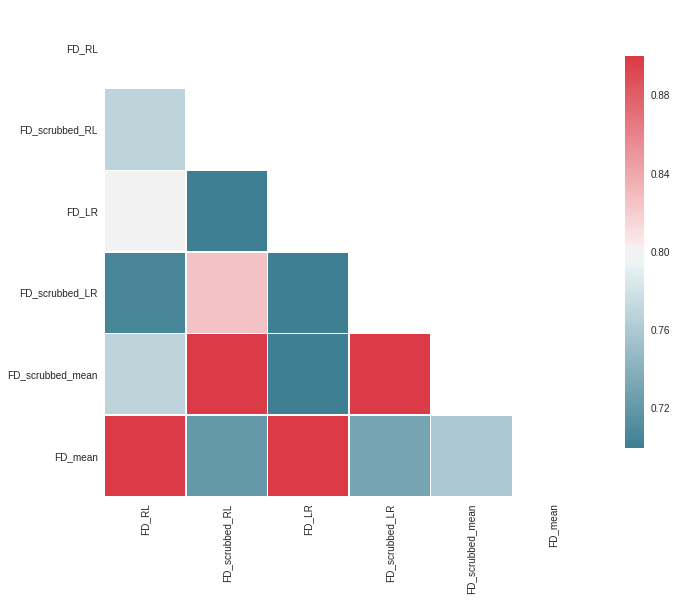

In [14]:
sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap,vmax=0.9,vmin=0.7,
            square=True,mask=mask,
            linewidths=.5, cbar_kws={"shrink": .8}, ax=ax)

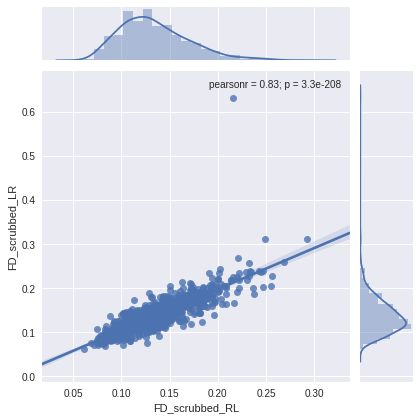

In [15]:
# FD_scrubbed correlation between runs
sns.set(color_codes=True)
sns.jointplot(x="FD_scrubbed_RL", y="FD_scrubbed_LR", data=merged_scrub_RL_LR_subset,kind="reg");

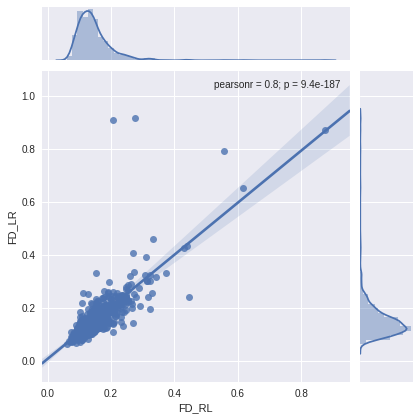

In [16]:
# FD correlation between runs
sns.set(color_codes=True)
sns.jointplot(x="FD_RL", y="FD_LR", data=merged_scrub_RL_LR_subset,kind="reg");

### merge clustered pheno with age gender and handedness

In [17]:
## merge clustered pheno with age gender and handedness
pheno_raw = pd.read_csv(os.path.join(path_root,'subtypes_scores/26-10-2016/pheno/hcp_all_pheno.csv'))
pheno_raw = pheno_raw.rename(columns=lambda x: x.strip())
pheno_clust = pd.read_csv(os.path.join(path_root,'subtypes_scores/26-10-2016/pheno/hcp_bootstraped_pheno_nonan_norm_python.csv'))
pheno_clust = pheno_clust.rename(columns=lambda x: x.strip())

In [18]:
merged_pheno = pd.merge(pheno_raw[['Subject','Age_in_Yrs','Gender','Twin_Stat','Zygosity','Mother_ID','BMI']],
                        pheno_clust, on='Subject', how='right')
merged_pheno.loc[:,'Subject'] = 'HCP' + merged_pheno['Subject'].astype(str)
merged_pheno.head()

,Subject,Age_in_Yrs,Gender,Twin_Stat,Zygosity,Mother_ID,BMI,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9
0,HCP100004,24,M,NotTwin,NotTwin,52259,25.49,1.187095,0.084484,0.252381,-1.531334,0.468441,-0.755941,0.397578,0.063112,-0.244554
1,HCP100206,27,M,NotTwin,NotTwin,56037,26.64,1.285200,1.430662,0.090595,-0.511867,0.708044,-0.311561,1.976455,-0.221303,0.571492
2,HCP100307,27,F,Twin,NotMZ,51488,22.96,0.523454,-0.714056,-0.663549,-0.142587,-0.559104,-0.582609,-0.704316,-0.792560,0.421945
3,HCP100408,33,M,Twin,MZ,51730,27.75,0.092377,-0.034456,1.070145,0.219718,-0.108636,0.026297,-0.590364,-0.167300,-0.049222
4,HCP100610,27,M,Twin,NotMZ,52813,36.91,-0.361653,-0.387092,0.813155,-0.198723,-0.575019,1.430869,0.201677,-0.631634,0.770983


In [19]:
# check if there is any nan value
merged_pheno.isnull().values.any()

True

In [20]:
# remove missing 
missing = np.array([merged_pheno[col].isnull().values for col in merged_pheno.columns.get_values()]).any(0)
merged_pheno_clean = merged_pheno[~missing]
merged_pheno_clean.count()

Subject       931
Age_in_Yrs    931
Gender        931
Twin_Stat     931
Zygosity      931
Mother_ID     931
BMI           931
Cluster_1     931
Cluster_2     931
Cluster_3     931
Cluster_4     931
Cluster_5     931
Cluster_6     931
Cluster_7     931
Cluster_8     931
Cluster_9     931
dtype: int64

In [21]:
# set gender to numerical
merged_pheno_clean.loc[:,'Gender']= merged_pheno_clean.Gender.replace({'M':1,'F':2})

/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [22]:
merged_pheno_clean.head()

,Subject,Age_in_Yrs,Gender,Twin_Stat,Zygosity,Mother_ID,BMI,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9
0,HCP100004,24,1,NotTwin,NotTwin,52259,25.49,1.187095,0.084484,0.252381,-1.531334,0.468441,-0.755941,0.397578,0.063112,-0.244554
1,HCP100206,27,1,NotTwin,NotTwin,56037,26.64,1.285200,1.430662,0.090595,-0.511867,0.708044,-0.311561,1.976455,-0.221303,0.571492
2,HCP100307,27,2,Twin,NotMZ,51488,22.96,0.523454,-0.714056,-0.663549,-0.142587,-0.559104,-0.582609,-0.704316,-0.792560,0.421945
3,HCP100408,33,1,Twin,MZ,51730,27.75,0.092377,-0.034456,1.070145,0.219718,-0.108636,0.026297,-0.590364,-0.167300,-0.049222
4,HCP100610,27,1,Twin,NotMZ,52813,36.91,-0.361653,-0.387092,0.813155,-0.198723,-0.575019,1.430869,0.201677,-0.631634,0.770983


In [23]:
#put HCP prefix then merge with scrubing
merged_pheno_scrub = pd.merge(merged_scrub_RL_LR_subset,merged_pheno_clean,how='left',left_on='',right_on='Subject')

In [24]:
merged_pheno_scrub.count()

                    830
FD_RL               828
FD_scrubbed_RL      828
FD_LR               830
FD_scrubbed_LR      830
FD_scrubbed_mean    830
FD_mean             830
Subject             803
Age_in_Yrs          803
Gender              803
Twin_Stat           803
Zygosity            803
Mother_ID           803
BMI                 803
Cluster_1           803
Cluster_2           803
Cluster_3           803
Cluster_4           803
Cluster_5           803
Cluster_6           803
Cluster_7           803
Cluster_8           803
Cluster_9           803
dtype: int64

In [25]:
# remove subject with missing data
missing_merged = np.array([merged_pheno_scrub[col].isnull().values for col in merged_pheno_scrub.columns.get_values()]).any(0)
merged_pheno_scrub_clean = merged_pheno_scrub[~missing_merged]

In [26]:
merged_pheno_scrub_clean.count()

                    801
FD_RL               801
FD_scrubbed_RL      801
FD_LR               801
FD_scrubbed_LR      801
FD_scrubbed_mean    801
FD_mean             801
Subject             801
Age_in_Yrs          801
Gender              801
Twin_Stat           801
Zygosity            801
Mother_ID           801
BMI                 801
Cluster_1           801
Cluster_2           801
Cluster_3           801
Cluster_4           801
Cluster_5           801
Cluster_6           801
Cluster_7           801
Cluster_8           801
Cluster_9           801
dtype: int64

In [27]:
merged_pheno_scrub_clean.head(10)

,,FD_RL,FD_scrubbed_RL,FD_LR,FD_scrubbed_LR,FD_scrubbed_mean,FD_mean,Subject,Age_in_Yrs,Gender,...,BMI,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9
0,HCP100206,0.098646,0.091387,0.118289,0.118289,0.104838,0.108467,HCP100206,27.0,1.0,...,26.64,1.285200,1.430662,0.090595,-0.511867,0.708044,-0.311561,1.976455,-0.221303,0.571492
1,HCP100307,0.108372,0.108372,0.098514,0.098514,0.103443,0.103443,HCP100307,27.0,2.0,...,22.96,0.523454,-0.714056,-0.663549,-0.142587,-0.559104,-0.582609,-0.704316,-0.792560,0.421945
2,HCP100408,0.113633,0.113633,0.145309,0.145309,0.129471,0.129471,HCP100408,33.0,1.0,...,27.75,0.092377,-0.034456,1.070145,0.219718,-0.108636,0.026297,-0.590364,-0.167300,-0.049222
3,HCP100610,0.184109,0.184109,0.170573,0.160610,0.172360,0.177341,HCP100610,27.0,1.0,...,36.91,-0.361653,-0.387092,0.813155,-0.198723,-0.575019,1.430869,0.201677,-0.631634,0.770983
4,HCP101006,0.146478,0.146478,0.152041,0.148402,0.147440,0.149260,HCP101006,35.0,2.0,...,30.27,0.037814,-0.884476,0.444130,-0.310122,-0.382892,-0.364271,-0.755113,0.459547,-0.740855
5,HCP101107,0.209471,0.110303,0.145773,0.086654,0.098479,0.177622,HCP101107,22.0,1.0,...,21.13,0.202495,0.226738,-0.559673,0.350452,1.342476,0.021861,-0.278376,0.342744,-0.562346
6,HCP101309,0.076072,0.076072,0.086923,0.086923,0.081497,0.081497,HCP101309,29.0,1.0,...,22.20,-1.055772,-0.784829,-0.488804,0.396601,-0.311712,0.270656,-0.669878,-0.148125,-0.599108
7,HCP101410,0.150343,0.150343,0.160767,0.160767,0.155555,0.155555,HCP101410,29.0,1.0,...,24.27,-0.213366,0.038804,0.648966,0.388945,-0.441041,-0.175267,-0.377717,-0.478595,-0.649063
8,HCP101915,0.087045,0.087045,0.091963,0.091963,0.089504,0.089504,HCP101915,35.0,2.0,...,20.42,-0.838038,-0.376029,-0.917120,1.173695,-0.365245,1.127413,-0.649360,-0.357989,-0.309757
9,HCP102008,0.150372,0.150372,0.148905,0.148905,0.149639,0.149639,HCP102008,24.0,1.0,...,31.42,-0.101973,0.951127,0.735433,0.654455,0.493727,0.160656,0.058103,-0.159212,0.394972


In [28]:
##save to csv
# for solar
merged_pheno_scrub_clean.to_csv(os.path.join(path_root,"subtypes_scores/26-10-2016/pheno/hcp_pheno_relational_raw.csv"), index=False)
# for subtype
merged_pheno_scrub_clean.drop(['Subject','Twin_Stat', 'Zygosity'], axis=1).to_csv(os.path.join(path_root,"subtypes_scores/26-10-2016/pheno/hcp_pheno_relational.csv"), index=False)